# PyTorch: Linear Regression

<div class="alert alert-warning">
    We use elemental PyTorch to implement linear regression here. However, in most actual applications, abstractions such as <code>nn.Module</code> or <code>nn.Linear</code> are used.
</div>

## Theoretical Overview

$$ H(x) = Wx + b $$

$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2 $$

## Imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# For reproducibility
torch.manual_seed(1)

## Data

We will use fake data for this example.

In [ ]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

In [ ]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [ ]:
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


PyTorch: NCHW

## Weight Initialization

In [ ]:
W = torch.zeros(1, requires_grad=True)
print(W)

tensor([0.], requires_grad=True)


In [ ]:
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


## Hypothesis

$$ H(x) = Wx + b $$

In [ ]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


## Cost

$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2 $$

In [ ]:
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [ ]:
print(y_train)

tensor([[1.],
        [2.],
        [3.]])


In [ ]:
print(hypothesis - y_train)

tensor([[-1.],
        [-2.],
        [-3.]], grad_fn=<SubBackward0>)


In [ ]:
print((hypothesis - y_train) ** 2)

tensor([[1.],
        [4.],
        [9.]], grad_fn=<PowBackward0>)


In [ ]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(4.6667, grad_fn=<MeanBackward0>)


## Gradient Descent

In [ ]:
optimizer = optim.SGD([W, b], lr=0.01)

In [ ]:
optimizer.zero_grad()
cost.backward()
optimizer.step()

In [ ]:
print(W)
print(b)

tensor([0.0933], requires_grad=True)
tensor([0.0400], requires_grad=True)


Let's check if the hypothesis is now better.

In [ ]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.1333],
        [0.2267],
        [0.3200]], grad_fn=<AddBackward0>)


In [ ]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(3.6927, grad_fn=<MeanBackward0>)


## Training with Full Code

In reality, we will be training on the dataset for multiple epochs. This can be done simply with loops.

In [ ]:
#Train Data
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# Initialize Weights and Bias
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x)
    hypothesis = x_train * W + b
    
    # cost
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # Print values for 100 epochs each
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1000 W: 0.093, b: 0.040 Cost: 4.666667
Epoch  100/1000 W: 0.873, b: 0.289 Cost: 0.012043
Epoch  200/1000 W: 0.900, b: 0.227 Cost: 0.007442
Epoch  300/1000 W: 0.921, b: 0.179 Cost: 0.004598
Epoch  400/1000 W: 0.938, b: 0.140 Cost: 0.002842
Epoch  500/1000 W: 0.951, b: 0.110 Cost: 0.001756
Epoch  600/1000 W: 0.962, b: 0.087 Cost: 0.001085
Epoch  700/1000 W: 0.970, b: 0.068 Cost: 0.000670
Epoch  800/1000 W: 0.976, b: 0.054 Cost: 0.000414
Epoch  900/1000 W: 0.981, b: 0.042 Cost: 0.000256
Epoch 1000/1000 W: 0.985, b: 0.033 Cost: 0.000158


## High-level Implementation with `nn.Module`

Remember that we had this fake data.

In [ ]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

Linear regression - PyTorch with `nn.Module`

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
model = LinearRegressionModel()

## Hypothesis

$H(x)$

In [ ]:
hypothesis = model(x_train)

In [ ]:
print(hypothesis)

tensor([[0.0739],
        [0.5891],
        [1.1044]], grad_fn=<ThAddmmBackward>)


## Cost

Mean squared error (MSE)

In [ ]:
print(hypothesis)
print(y_train)

tensor([[0.0739],
        [0.5891],
        [1.1044]], grad_fn=<ThAddmmBackward>)
tensor([[1.],
        [2.],
        [3.]])


In [ ]:
cost = F.mse_loss(hypothesis, y_train)

In [ ]:
print(cost)

tensor(2.1471, grad_fn=<MseLossBackward>)


## Gradient Descent

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
optimizer.zero_grad()
cost.backward()
optimizer.step()

## Training with Full Code

Linear Regression

In [ ]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

model = LinearRegressionModel()
# optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x)
    prediction = model(x_train)
    
    # cost
    cost = F.mse_loss(prediction, y_train)
    

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    

    if epoch % 100 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W, b, cost.item()
        ))

Epoch    0/1000 W: -0.101, b: 0.508 Cost: 4.630286
Epoch  100/1000 W: 0.713, b: 0.653 Cost: 0.061555
Epoch  200/1000 W: 0.774, b: 0.514 Cost: 0.038037
Epoch  300/1000 W: 0.822, b: 0.404 Cost: 0.023505
Epoch  400/1000 W: 0.860, b: 0.317 Cost: 0.014525
Epoch  500/1000 W: 0.890, b: 0.250 Cost: 0.008975
Epoch  600/1000 W: 0.914, b: 0.196 Cost: 0.005546
Epoch  700/1000 W: 0.932, b: 0.154 Cost: 0.003427
Epoch  800/1000 W: 0.947, b: 0.121 Cost: 0.002118
Epoch  900/1000 W: 0.958, b: 0.095 Cost: 0.001309
Epoch 1000/1000 W: 0.967, b: 0.075 Cost: 0.000809


**Single Layer Perceptron - Regression**

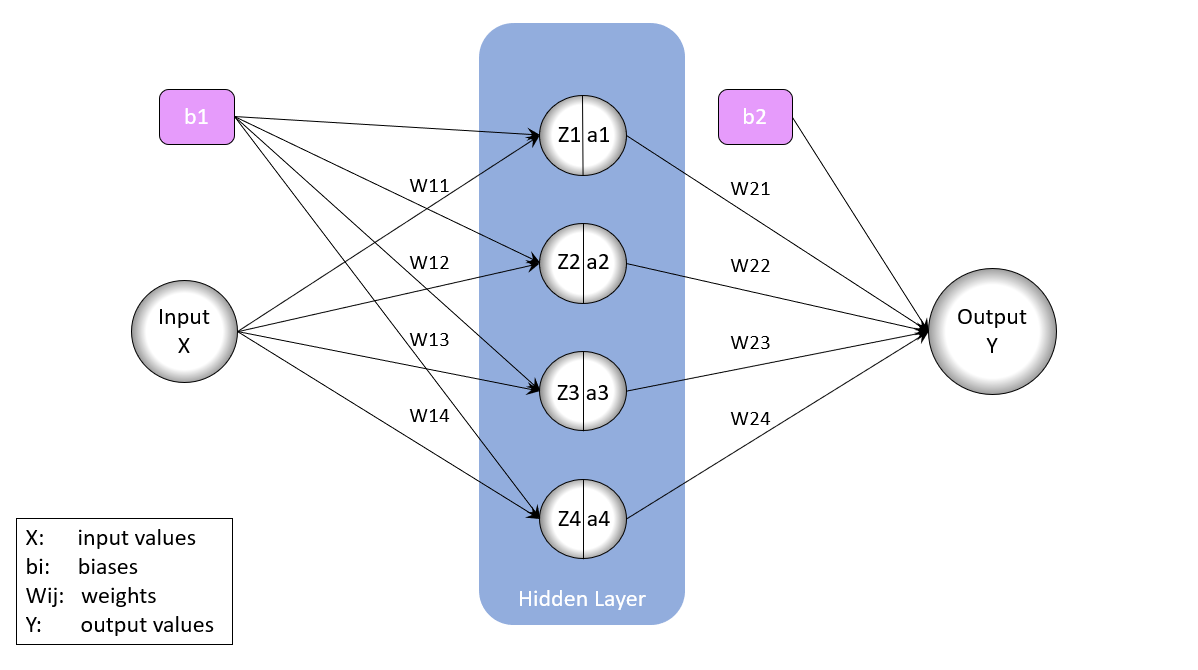

Conceptually, you think of feedforward neural networks as two or more linear regression models stacked on top of one another with a non-linear activation function applied between them.

To use a feedforward neural network instead of linear regression, we can extend the nn.Module class from PyTorch.



In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)


plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

#Single Layer Perceptron
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=5, n_output=1)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(200):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

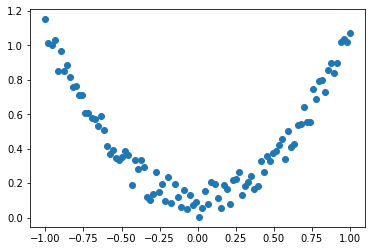

Net(
  (hidden1): Linear(in_features=1, out_features=2, bias=True)
  (hidden2): Linear(in_features=2, out_features=2, bias=True)
  (predict): Linear(in_features=2, out_features=1, bias=True)
)


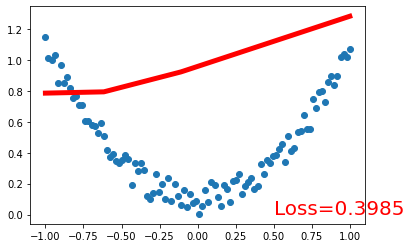

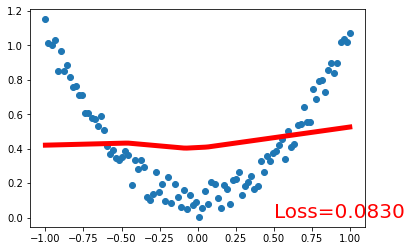

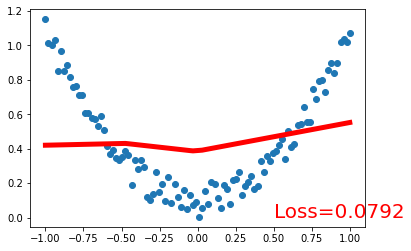

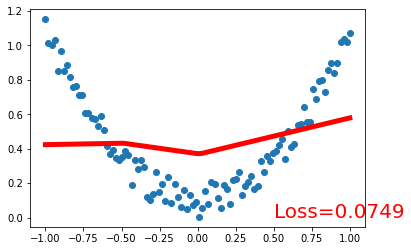

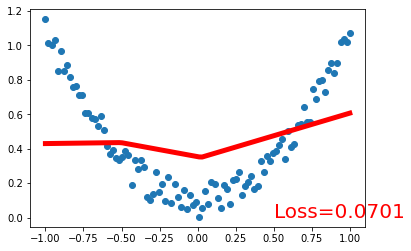

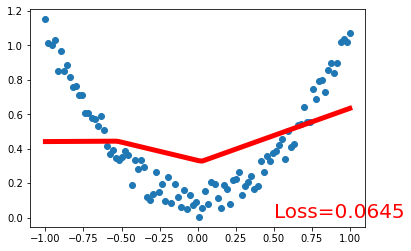

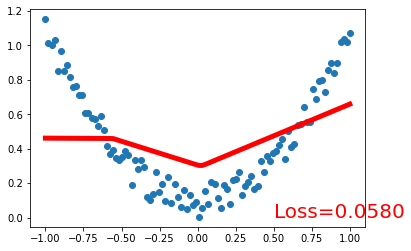

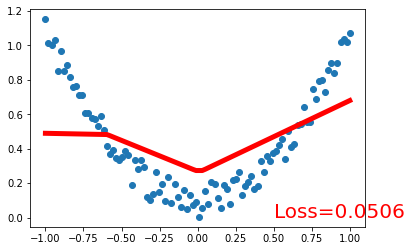

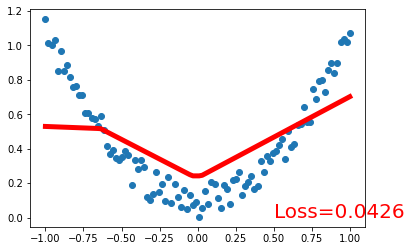

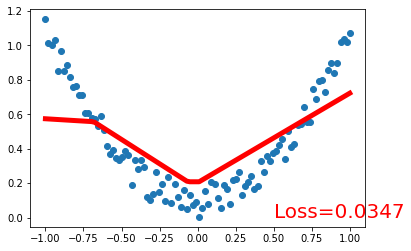

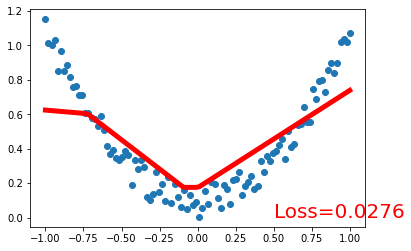

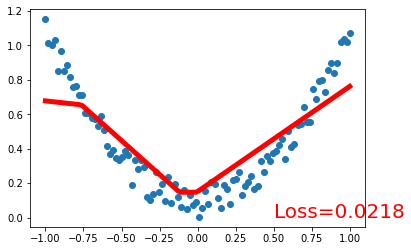

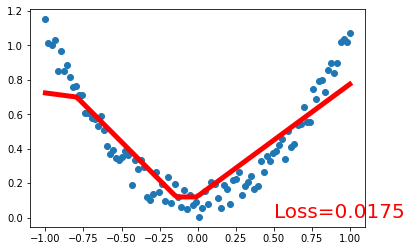

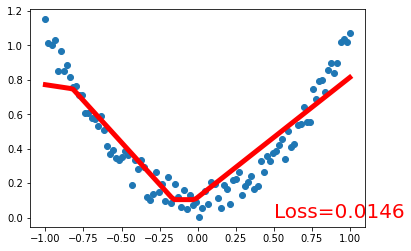

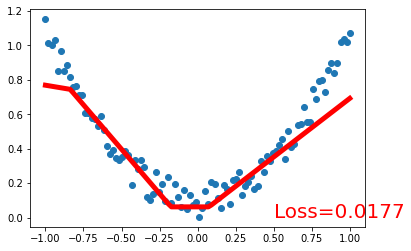

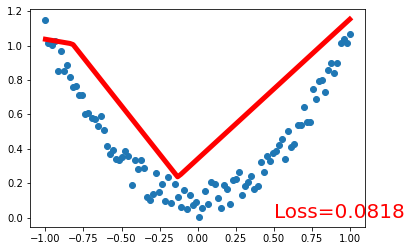

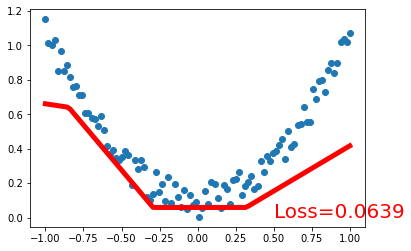

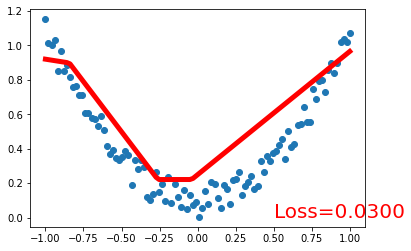

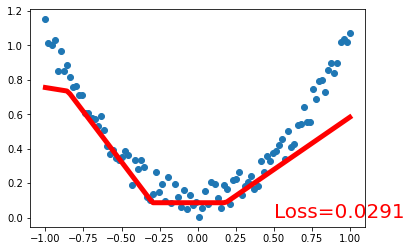

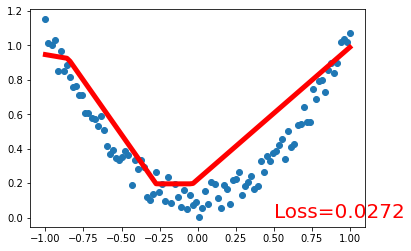

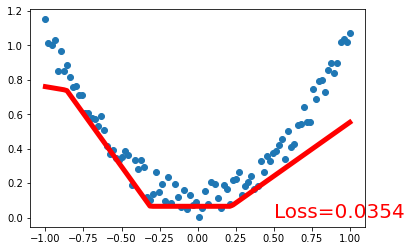

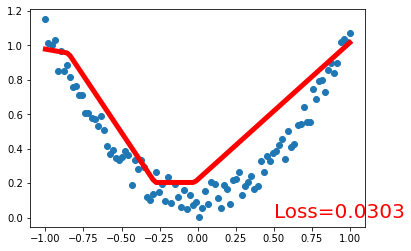

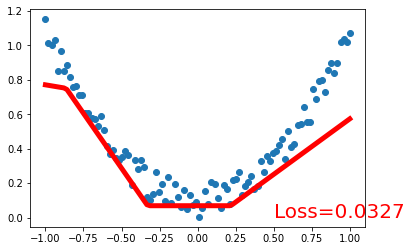

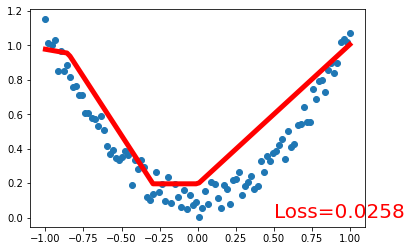

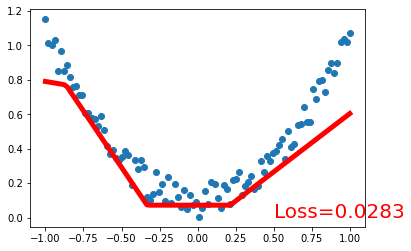

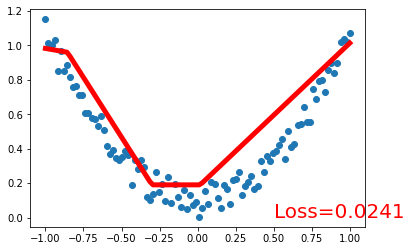

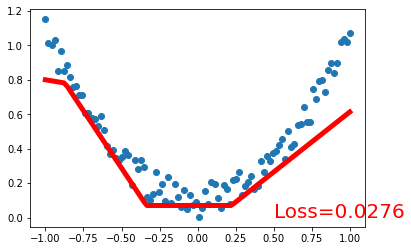

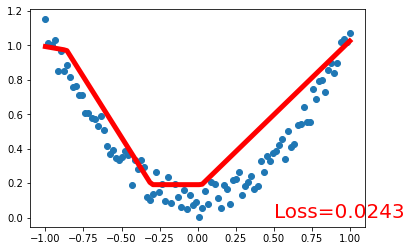

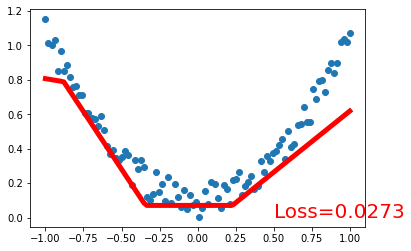

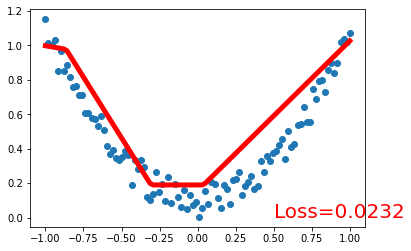

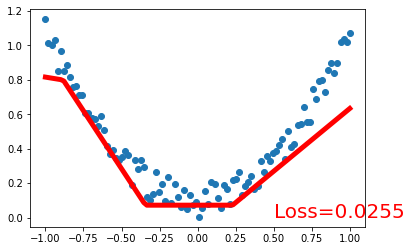

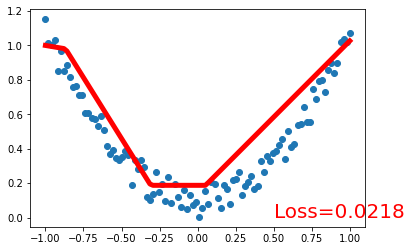

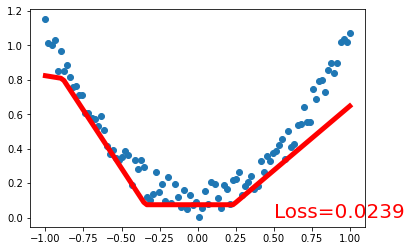

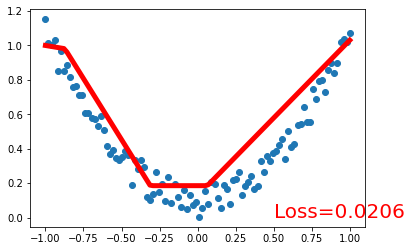

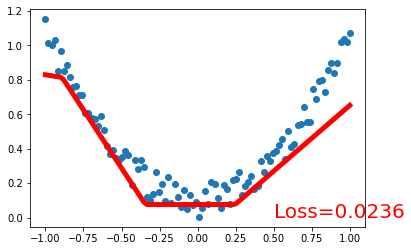

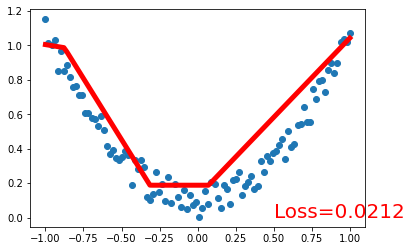

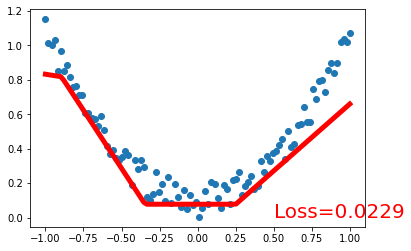

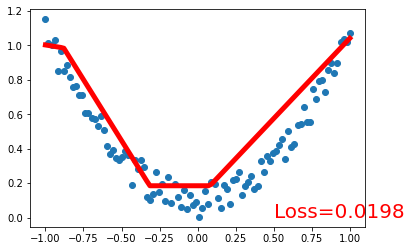

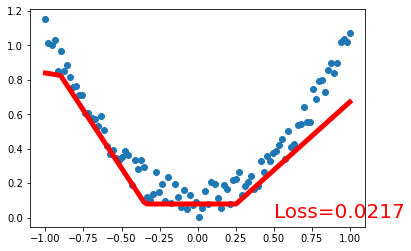

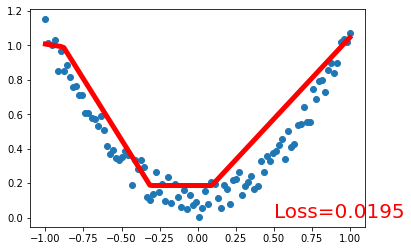

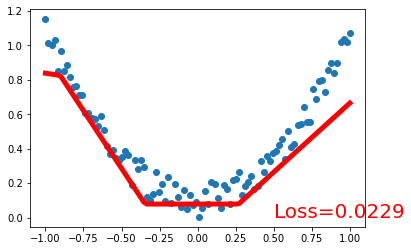

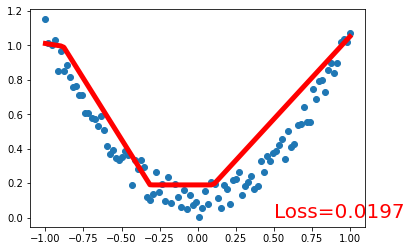

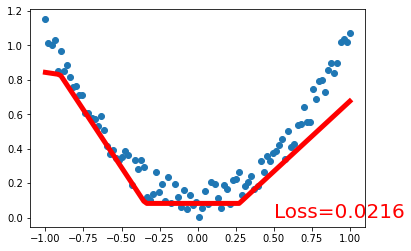

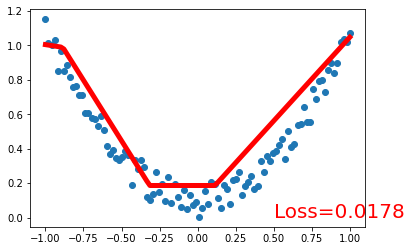

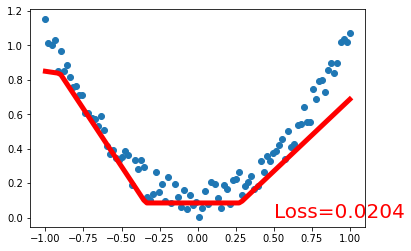

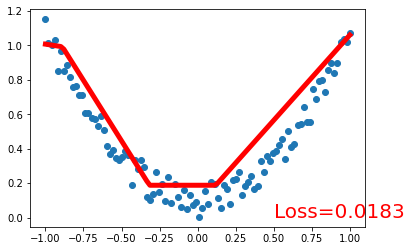

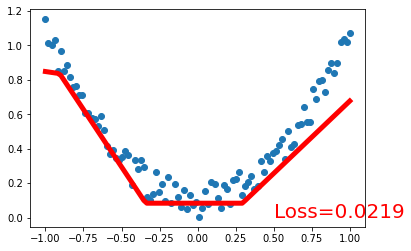

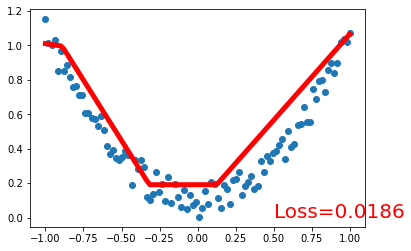

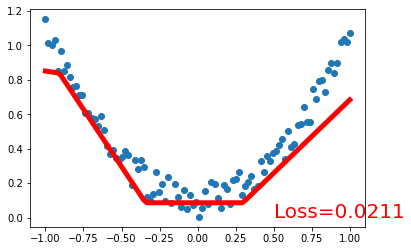

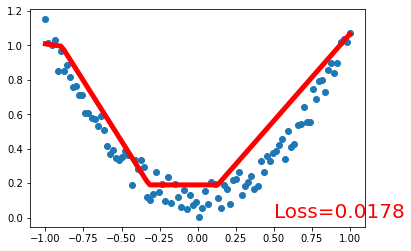

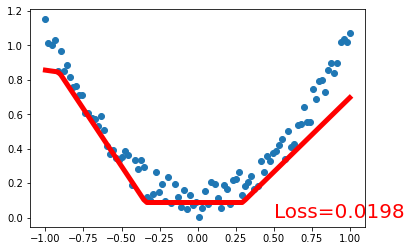

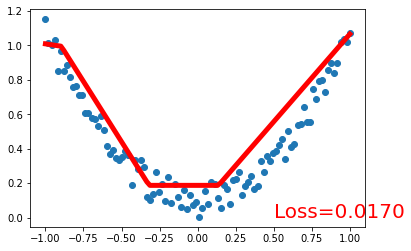

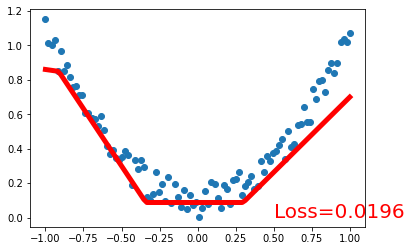

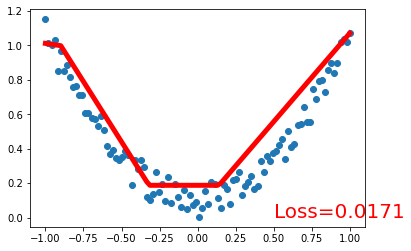

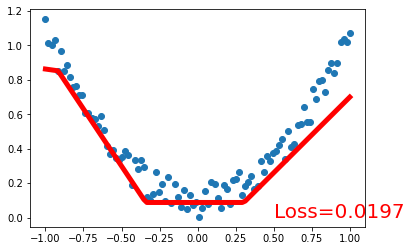

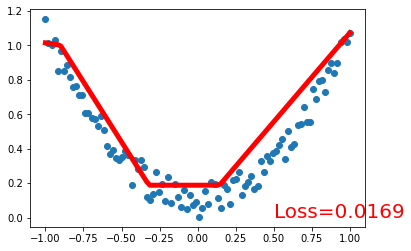

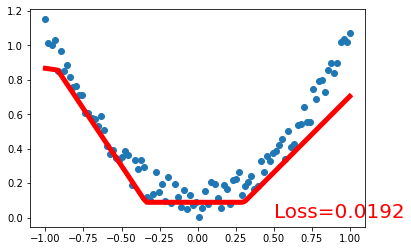

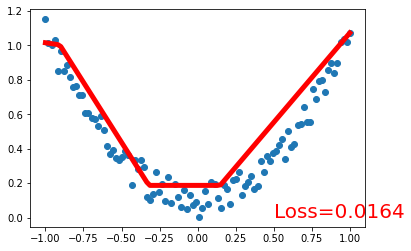

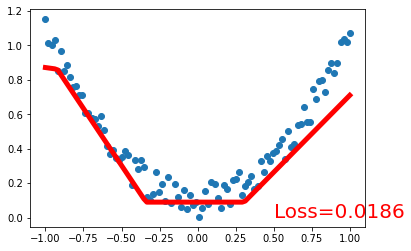

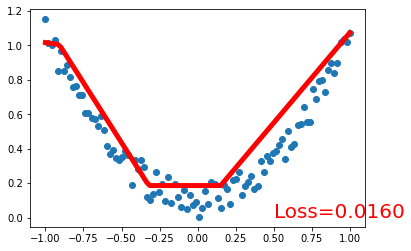

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)


plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

#Single Layer Perceptron
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden1,n_hidden2, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1)
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden2, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden1(x))      # activation function for hidden layer
        x = F.relu(self.hidden2(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden1=2, n_hidden2=2, n_output=1)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(300):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()